## This notebook is meant to manually validate the bounding boxes of an image dataset

Start from checked_until = 0, validate bbox, increase checked_until by 1 and repeat. 

In [12]:
import math
import os
from typing import List, Tuple

import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

import gorillatracker.utils.visualizer_helpers as vh
import gorillatracker.utils.cutout_helpers as cutout_helpers


def show_bbox_grid(
    images: List[npt.NDArray[np.uint8]], bboxes: List[Tuple[Tuple[int, int], Tuple[int, int]]], width: int = 3
):
    """
    Shows a grid of images with their bounding boxes
    """
    height = math.ceil(len(images) / width)
    fig, axs = plt.subplots(height, width, figsize=(20, 40))

    # Ensure axs is a 2D array
    axs = np.array(axs).reshape(height, width)

    for i, image in enumerate(images):
        ax = axs[i // width, i % width]
        image = vh.draw_bbox(image, bboxes[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)

    for ax in axs.ravel():
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


base_path = "/workspaces/gorillatracker/data/ground_truth"
full_images_path = f"{base_path}/cxl/full_images"
face_images_path = f"{base_path}/rohan-cxl/face_images"
face_images_names = os.listdir(face_images_path)
faces_images_grouped = {}
for face_image in face_images_names:
    face_image_group = face_image[:4]
    if face_image_group not in faces_images_grouped:
        faces_images_grouped[face_image_group] = []
    faces_images_grouped[face_image_group].append(face_image)

In [13]:
faces_images_grouped.keys()

dict_keys(['JZ40', 'NN03', 'MU00', 'AP01', 'NN02', 'RC41', 'PL02', 'HU23', 'RC00', 'HU40', 'GA01', 'b0_R', 'OE00', 'TU03', 'AP03', 'US04', 'RC01', 'TU01', 'AP40', 'US02', 'RC42', 'PL00', 'NN40', 'YE40', 'ES03', 'NN43', 'JP60', 'ZU06', 'AY00', 'AP00', 'ME00', 'US01', 'AY04', 'HU24', 'NN41', 'US41', 'PL43', 'PL01', 'AP02', 'OE02', 'PL44', 'JZ20', 'JZ01', 'HU22', 'YE00', 'ME01', 'RC43', 'PL46', 'PL47', 'US00', 'OE01', 'RC02', 'ES01', 'AP61', 'RC60', 'JZ41', 'US03', 'RC21', 'HU20', 'HU25', 'JZ00', 'PL03', 'GA00', 'US43', 'RC20', 'PV00', 'RC40', 'GA40', 'TU20', 'HU21', 'GR00', 'JP00', 'OE40', 'TU02', 'US42', 'PL45', 'DU00', 'AP60', 'ES00', 'ZU02', 'GA02', 'YE01', 'ES02', 'PL04', 'PL41', 'US40', 'NN60', 'OE41', 'YE02', 'HU00', 'TU05', 'GR01', 'PL40', 'DU01', 'TU06', 'NN42', 'ME60', 'DU60', 'US60', 'DU40', 'NN01', 'JP01', 'YE03', 'NN61', 'NN44', 'ZU05', 'NN00', 'NN20', 'TU41', 'JB00', 'TU60', 'TU04', 'PL42'])

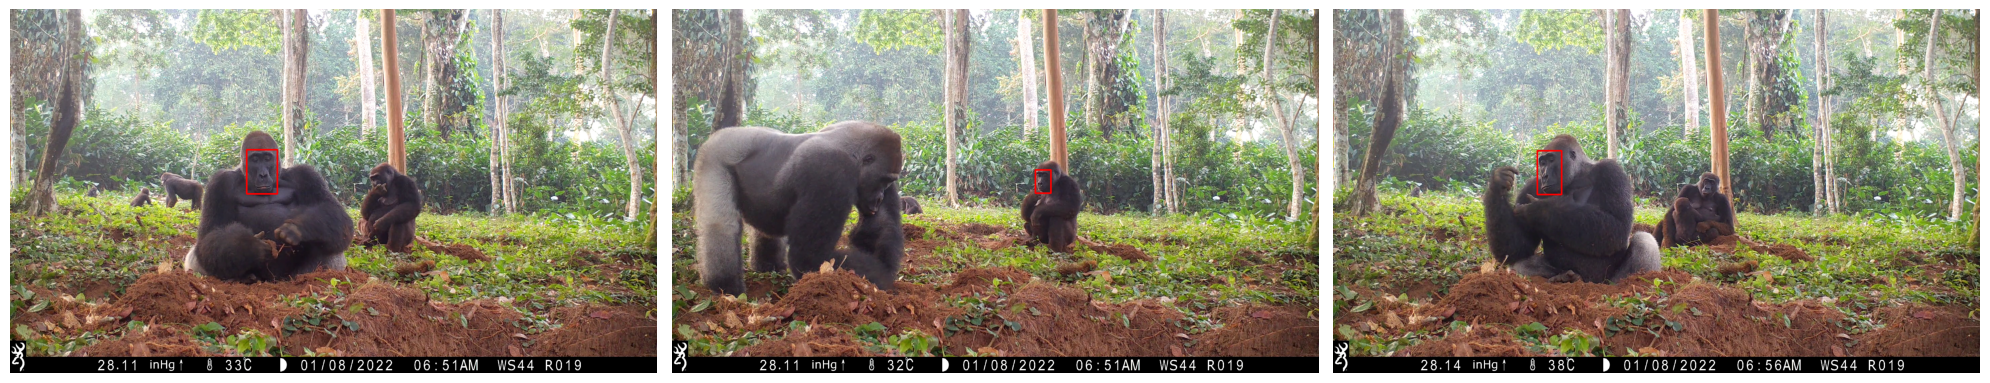

In [14]:
# checked all images (111)
checked_until = 111
# Error in: NN03, AP02 (larger problem), JZ01 (single wrong image), PV00 (?), NN00
ERROR_IN_GROUPS = ["NN03", "AP02", "JZ01", "PV00", "NN00"]
# Uncertainty in SPAC Dataset: b0_R (multiple individuals?), JP60 (could be Silverback or Baby)
# group = list(faces_images_grouped)[checked_until]
# print(group)
group = "NN00"
face_image_group = faces_images_grouped[group]
full_images = []
face_bboxes = []
for face_image_name in face_image_group:
    full_image = cv2.imread(f"{full_images_path}/{face_image_name}")
    face_image = cv2.imread(f"{face_images_path}/{face_image_name}")
    face_bboxes.append(cutout_helpers.get_cutout_bbox(full_image, face_image))
    full_images.append(full_image)


show_bbox_grid(full_images, face_bboxes)

In [17]:
COPY = False
target_dir = "/workspaces/gorillatracker/data/ground_truth/cxl/face_images"

correct_face_images = [face_image for face_image in face_images_names if face_image[:4] not in ERROR_IN_GROUPS]


print(f"Copying {len(correct_face_images)}/{len(face_images_names)} images")

for image in correct_face_images:
    action = f"cp '{face_images_path}/{image}' '{target_dir}/{image}'"
    if COPY:
        os.system(action)
    else:
        print(action)

Copying 800/854 images
